# Inrtoduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable base on other combination of variables, even shorter... prediction a number.

In [2]:
# Import tensorflow
import tensorflow as tf

## Creating data to view and fit



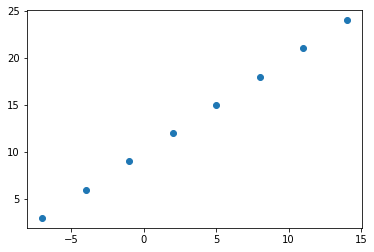

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7., -4., -1., 2., 5., 8., 11., 14.])

# Create lables
y = np.array([3., 6., 9., 12., 15., 18., 21., 24])

# Visualize it
plt.scatter(X, y);

In [4]:
# This is the relationship we want our network to learn
y == X + 10 

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [5]:
# Create asdemo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [6]:
input_shape = X[0].shape
output_shape = y[0].shape

"""
Has no shape!! It is scalor!!
"""

input_shape, output_shape

((), ())

In [7]:
# Turn our numpy arrays into tensors with dtype float32

X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

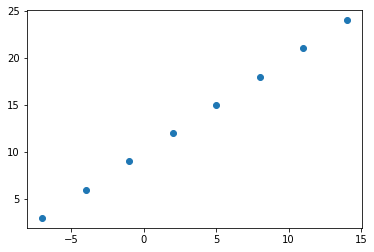

In [9]:
plt.scatter(X, y);

## Steps in modeling with TensorFlow

1. **Creating a modle** - define in/output layers, as well the hidden layers.

2. **Compliling a model** - define the loss function (in others words, the function which tells our model how wrong it is) and the optimizer (tells our model hoe to improve the model) and evaluation matrics (what we can use to interprete the performance our model)

3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels)

In [10]:
# Set random seed 
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absloute error
             optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic grasient descent
             metrics=["mae"])

# 3. Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5);


Epoch 1/5


1/1 [==============================] - 0s 375ms/step - loss: 18.5854 - mae: 18.5854
Epoch 2/5
1/1 [==============================] - 0s 3ms/step - loss: 18.3041 - mae: 18.3041
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 18.0229 - mae: 18.0229
Epoch 4/5
1/1 [==============================] - 0s 4ms/step - loss: 17.7416 - mae: 17.7416
Epoch 5/5
1/1 [==============================] - 0s 3ms/step - loss: 17.4604 - mae: 17.4604


In [11]:
# Try and make a prediction using our model
model.predict([17])

1/1 [==============================] - 0s 66ms/step


array([[-14.395477]], dtype=float32)

## Improve our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - Here we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activation of each layer.
2. **Compiling a model** - Here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - Here we might fit a model for more **epochs** (leave it training more times/more data)

In [12]:
# Let's rebuilt our model
tf.random.set_seed(42)

# 1. Create our model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])


# 2. Compile this model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absloute error
             optimizer=tf.keras.optimizers.SGD(), # Or change the optimizers to Adam()...
             metrics=["mae"])

# 3. Fit the model (this time for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100);


Epoch 1/100
1/1 [==============================] - 0s 169ms/step - loss: 11.5485 - mae: 11.5485
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 11.4160 - mae: 11.4160
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 11.2835 - mae: 11.2835
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 11.1510 - mae: 11.1510
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 11.0185 - mae: 11.0185
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 10.8860 - mae: 10.8860
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 10.7535 - mae: 10.7535
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 10.6210 - mae: 10.6210
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 10.4885 - mae: 10.4885
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 10.3560 - mae: 10.3560
Epoch 11/100
1/1 [==============================] - 0s 3m

1/1 [==============================] - 0s 2ms/step - loss: 6.9488 - mae: 6.9488
Epoch 89/100
1/1 [==============================] - 0s 3ms/step - loss: 6.9431 - mae: 6.9431
Epoch 90/100
1/1 [==============================] - 0s 3ms/step - loss: 6.9375 - mae: 6.9375
Epoch 91/100
1/1 [==============================] - 0s 3ms/step - loss: 6.9319 - mae: 6.9319
Epoch 92/100
1/1 [==============================] - 0s 4ms/step - loss: 6.9263 - mae: 6.9263
Epoch 93/100
1/1 [==============================] - 0s 3ms/step - loss: 6.9206 - mae: 6.9206
Epoch 94/100
1/1 [==============================] - 0s 3ms/step - loss: 6.9150 - mae: 6.9150
Epoch 95/100
1/1 [==============================] - 0s 4ms/step - loss: 6.9094 - mae: 6.9094
Epoch 96/100
1/1 [==============================] - 0s 3ms/step - loss: 6.9038 - mae: 6.9038
Epoch 97/100
1/1 [==============================] - 0s 3ms/step - loss: 6.8981 - mae: 6.8981
Epoch 98/100
1/1 [==============================] - 0s 4ms/step - loss: 6.8925 - ma

In [13]:
# Try the model have been improved or not
model.predict([17])

1/1 [==============================] - 0s 42ms/step


array([[29.946037]], dtype=float32)

In [14]:
# Let's see if we can make another to omprove our model

# Let's rebuilt our model
tf.random.set_seed(42)

# 1. Create our model (with extra hidden layers)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])


# 2. Compile this model
model.compile(loss="mae", # mae is short for mean absloute error
             optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01), # Or change the optimizers to Adam()...
             metrics=["mae"])

# 3. Fit the model (this time for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100);

Epoch 1/100
1/1 [==============================] - 0s 313ms/step - loss: 13.5067 - mae: 13.5067
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 12.6829 - mae: 12.6829
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 11.8659 - mae: 11.8659
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 11.0459 - mae: 11.0459
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 10.2080 - mae: 10.2080
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 9.4615 - mae: 9.4615
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 8.7715 - mae: 8.7715
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 8.0497 - mae: 8.0497
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 7.2963 - mae: 7.2963
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 6.5060 - mae: 6.5060
Epoch 11/100
1/1 [==============================] - 0s 3ms/step - l

1/1 [==============================] - 0s 3ms/step - loss: 0.1859 - mae: 0.1859
Epoch 90/100
1/1 [==============================] - 0s 4ms/step - loss: 0.1602 - mae: 0.1602
Epoch 91/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1995 - mae: 0.1995
Epoch 92/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2184 - mae: 0.2184
Epoch 93/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2214 - mae: 0.2214
Epoch 94/100
1/1 [==============================] - 0s 4ms/step - loss: 0.1389 - mae: 0.1389
Epoch 95/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1202 - mae: 0.1202
Epoch 96/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1099 - mae: 0.1099
Epoch 97/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1107 - mae: 0.1107
Epoch 98/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1249 - mae: 0.1249
Epoch 99/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1302 - ma

In [15]:
# Make the prediction

"""
It might not cause better. It is over-fitting💥
"""

model.predict([17.])

1/1 [==============================] - 0s 46ms/step


array([[27.236105]], dtype=float32)

## Evaluting a model

In practice, a typical workflow you'll go through when building neural networks is :

```
> Build a model -> Fit it -> Evaluate it -> Tweak a model -> Fit it-> Evaluate it -> Tweak it...
```

When comes to evaluation... there are 3 words you should memorize:

> "Visualize, Visualize, Visualize"

It is a good idea to visualize:
* The data - what da ta are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (original label)


In [16]:
# Make a big dataset
X = tf.range(-100., 100., 4.)
X

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
        -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
        -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
          8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
         44.,   48.,   52.,   56.,   60.,   64.,   68.,   72.,   76.,
         80.,   84.,   88.,   92.,   96.], dtype=float32)>

In [17]:
# Make lables for dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([-90., -86., -82., -78., -74., -70., -66., -62., -58., -54., -50.,
       -46., -42., -38., -34., -30., -26., -22., -18., -14., -10.,  -6.,
        -2.,   2.,   6.,  10.,  14.,  18.,  22.,  26.,  30.,  34.,  38.,
        42.,  46.,  50.,  54.,  58.,  62.,  66.,  70.,  74.,  78.,  82.,
        86.,  90.,  94.,  98., 102., 106.], dtype=float32)>

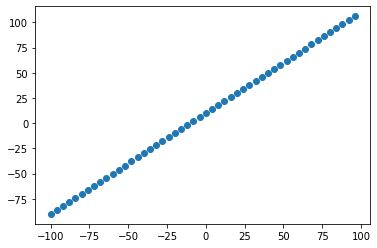

In [18]:
# Visaulize a data
plt.scatter(X, y)

### The 3 sets ...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have availiable.
* **Validation set** - the mode gets tuned on this data, which is typically 10-15% of data available.
* **Test set - the** model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data.

In [19]:
# Check the length of how man data set we have
len(X)

50

In [20]:
# Split data into train and test set
X_train = X[:40] # First 80%
X_test = X[40:] # Last 20%

y_train = y[:40] # First 80%
y_test = y[40:] # Last 20%

len(X_train), len(X_test)

(40, 10)

### Visualizing the data

Now we've got our data in traing and test sets... let's visualize it again!

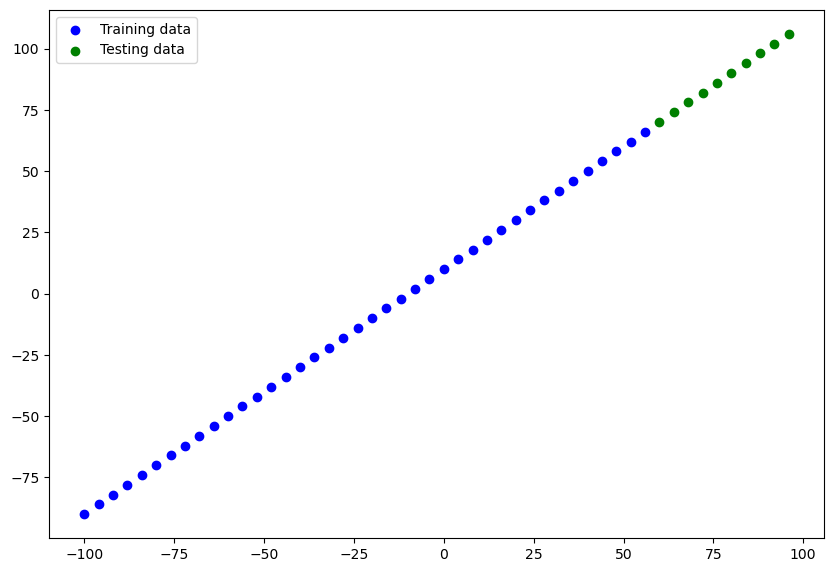

In [21]:
plt.figure(figsize=(10,7), dpi=100)

# Plot traing data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")

# Plot the test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")

#Show a legend
plt.legend();

In [22]:
# Let's have a look at how to built a neural network for our data

# Set a seed
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1])
])

# 2. Compile the model
model.compile(
    loss = "mae",
    optimizer = "sgd",
    metrics=["mae"]
)

# 3. Fit the model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0);

### Visualizing the model

In [23]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                20        
                                                                 
Total params: 20 (80.00 Byte)
Trainable params: 20 (80.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* **Total params** - total number of parameters in the model.
* **Trainable params** - these are the parameters (patterns) the model can update as it trains.
* **Non-trainable params** - these parameters aren't updated during training(this is typical when yuo gring in already learn patterns or parameters from other models during **transfer learning**).

In [24]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred = tf.constant(y_pred[:, -1])

1/1 [==============================] - 0s 29ms/step


🔑 **Note:** If you feel like you're going to reuse some kind of functionality in the fucture. It is a good idea turn it into a function.

In [25]:
# Let's create a plotting function

def plot_prediction(train_data = X_train, 
          train_lables = y_train, 
          test_data = X_test, 
          test_lables = y_test,
          predictions = y_pred):
  
  """
  Plot training data, test data and compares predictions to groundtruth labels.
  """

  plt.figure(figsize=(10, 7), dpi=100)

  # Plot traing data in blue
  plt.scatter(X_train, y_train, c="b", label="Training data")

  # Plot testing data in green
  plt.scatter(X_test, y_test, c="g", label="Testing data")

  # Plot the predict data in red
  plt.scatter(test_data, y_pred, c="r", label="Predictions")

  # Show the legend
  plt.legend();

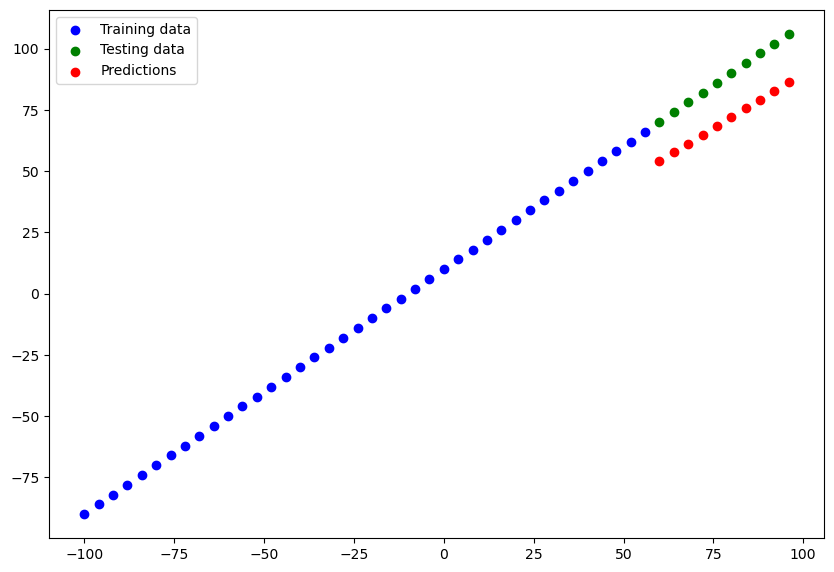

In [26]:
plot_prediction()
# X_test.shape

### Evalution our model's prediction with regreddion evaluatin metrics.

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your modelk's performance.

Since we're working on regression, two of the main metrics:
* **MAE** - mean absloute error, "on average, how wrong is each of my model's predictions"
* **MSE** - mean square error, "square the average errors"

In [27]:
# Calculate the mean absolute error 
tf.keras.losses.MAE(y_test, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=17.82593>

In [28]:
# Calculate the mean square error 
tf.keras.losses.MSE(y_test, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=319.1414>

In [29]:
# Make some functions to reuse MAE and MSE

def mae(y_true, y_pred):
    return tf.keras.losses.MAE(y_test, y_pred)

def mse(y_true, y_pred):
    return tf.keras.losses.MSE(y_test, y_pred)

### Running experiments to improve our model

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and lables).
2. Make your model larger (using a more complex model) - this might come in more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to fin patterns in the data.


Let's do three modeling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs 
3. `model_3` - 2 layers, optimizer change to Adam

### Build `model_1`

In [30]:
# Let's have a look at how to built a neural network for our data

# Set a seed
tf.random.set_seed(42)

# 1. Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1])
])

# 2. Compile the model
model_1.compile(
    loss = "mae",
    optimizer = "sgd",
    metrics=["mae"]
)

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0);


# Make some predictions
y_pred = model_1.predict(X_test)
y_pred = tf.constant(y_pred[:, -1])

1/1 [==============================] - 0s 29ms/step


MAE for model_1: 17.835365
MSE for model_1: 319.4817


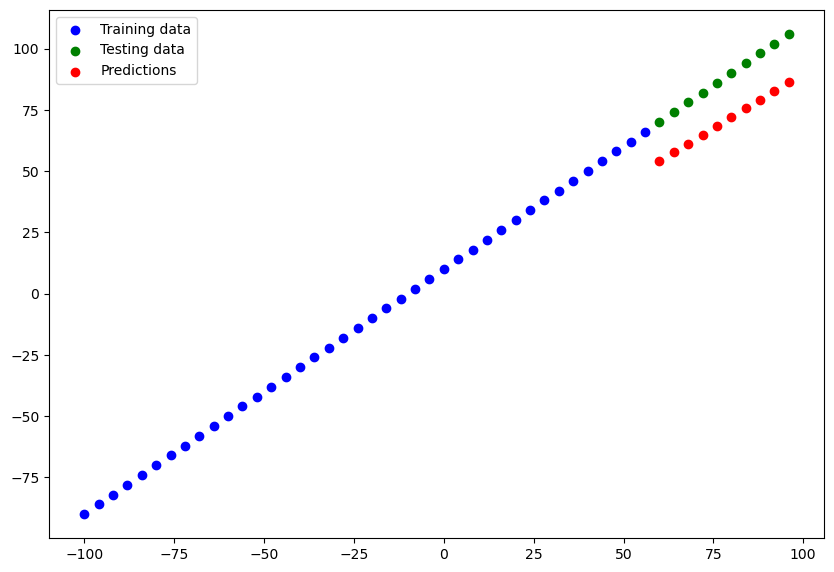

In [31]:
plot_prediction()

mae_1 = mae(y_test, y_pred).numpy()
mse_1 = mse(y_test, y_pred).numpy()

print("MAE for model_1:" ,mae(y_test, y_pred).numpy())
print("MSE for model_1:" ,mse(y_test, y_pred).numpy())

### Build `model_2`

In [32]:
# Let's have a look at how to built a neural network for our data

# Set a seed
tf.random.set_seed(42)

# 1. Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1]),
    tf.keras.layers.Dense(100, input_shape=[1])
])

# 2. Compile the model
model_2.compile(
    loss = "mae",
    optimizer = "sgd",
    metrics=["mae"]
)

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0);

# Make some predictions
y_pred = model_2.predict(X_test)
y_pred = tf.constant(y_pred[:, -1])

1/1 [==============================] - 0s 34ms/step


MAE for model_2: 16.266132
MSE for model_2: 265.475


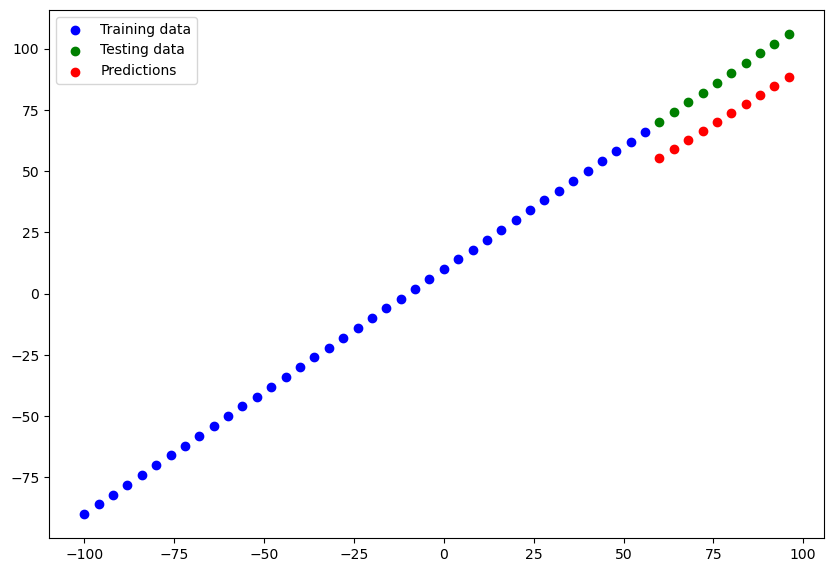

In [33]:
plot_prediction()

mae_2 = mae(y_test, y_pred).numpy()
mse_2 = mse(y_test, y_pred).numpy()

print("MAE for model_2:" ,mae(y_test, y_pred).numpy())
print("MSE for model_2:" ,mse(y_test, y_pred).numpy())

### Build `model_3`

In [34]:
# Let's have a look at how to built a neural network for our data

# Set a seed
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1]),
    tf.keras.layers.Dense(100, input_shape=[1])
])

# 2. Compile the model
model_3.compile(
    loss = "mae",
    optimizer = tf.optimizers.Adam(learning_rate = 0.01),
    metrics=["mae"]
)

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0);

# Make some predictions
y_pred = model_3.predict(X_test)
y_pred = tf.constant(y_pred[:, -1])

1/1 [==============================] - 0s 31ms/step


MAE for model_3: 1.3224876
MSE for model_3: 1.7842258


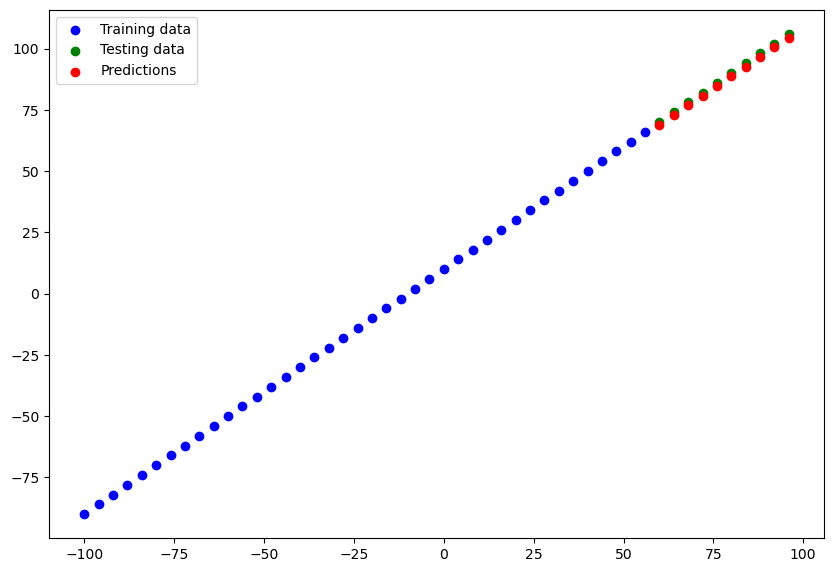

In [35]:
plot_prediction()

mae_3 = mae(y_test, y_pred).numpy()
mse_3 = mse(y_test, y_pred).numpy()

print("MAE for model_3:" ,mae(y_test, y_pred).numpy())
print("MSE for model_3:" ,mse(y_test, y_pred).numpy())

🔑 **Note:** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

### Comapring the results of our experiments

We've run a few experiments, let's compare the results.

In [36]:
# Let's comapre our model's result using a pandas dataframe
import pandas as pd

model_results = [["model_1", mae_1, mse_1],
                ["model_2", mae_2, mse_2],
                ["model_3", mae_3, mse_3]]

all_result = pd.DataFrame(model_results, columns=["model", "mae", "mse"])

all_result

,model,mae,mse
0,model_1,17.835365,319.481689
1,model_2,16.266132,265.475006
2,model_3,1.322488,1.784226


Looks like `model_3` perform the best~~ 🐵

In [37]:
model_3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               200       
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
Total params: 10300 (40.23 KB)
Trainable params: 10300 (40.23 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


> 🔑 **Note:** One of your main goals should be to minimize the time between your experiments.   
The more experiments you do the more things you fighure it out which do not work and in turn, get closer what does work.

## Traking your experiments

One good habbit in machine learning modelling is to track results of your experiments.

And when doing so, it can be trdious if you're running lots of experiments.

Luckily, there are tools to help us!

 📖 **Resource:** As you build more models, you'll want to look into using:

* TensorBoard - a component of TensorFlow library to help track modeling experiments
* Weights & Biases - a tool for tracking all kinds of machine learning experiments

### Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or mobile app. 📱

There are two formats we can save our model's to:

1. **SavedModel**
2. **HDF5**

In [38]:
# Save nodel using the SaveModel fomat
model_3.save("Best_model")

INFO:tensorflow:Assets written to: Best_model\assets


INFO:tensorflow:Assets written to: Best_model\assets


## Loading a saved model

In [39]:
# Loading a saved model
loaded_SAvedModel_format = tf.keras.models.load_model("Best_model")
loaded_SAvedModel_format.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               200       
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
Total params: 10300 (40.23 KB)
Trainable params: 10300 (40.23 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
# Compare model3 predictions with saved model predictions
y_pred = model_3.predict(X_test)
y_pred = tf.constant(y_pred[:, -1])

loaded_SAvedModel_format_preds = loaded_SAvedModel_format.predict(X_test)
loaded_SAvedModel_format_preds = tf.constant(loaded_SAvedModel_format_preds[:, -1])

# print(y_pred.numpy())
# print(loaded_SAvedModel_format_preds.numpy())

loaded_SAvedModel_format_preds == y_pred

1/1 [==============================] - 0s 32ms/step


<tf.Tensor: shape=(10,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])>

## A larger example

In [41]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [42]:
# Read in  the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#### One-hot encoding

In pandas we will use `pd.get_dummies()` function.

In [43]:
# Using One-hot encoding
insurance_onehot = pd.get_dummies(insurance)

insurance_onehot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [44]:
# Create X & Y values(features and lables)
X = insurance_onehot.drop("charges", axis=1)
y = insurance_onehot["charges"]

In [45]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [46]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [48]:
# Creat training and test set
from sklearn.model_selection import train_test_split